## Feature Engineering (model v01)

#### Import relevant libraries

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#### Load processed dataset

In [2]:
input_dir = os.path.join('..', 'data', 'processed')
data_df = pd.read_csv(os.path.join(input_dir, 'processed_data.csv'))
data_df

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,generation_renewables_and_storage,generation_steam,roe,pp_mwh_fossil_fuel,pp_mwh_hydro,pp_mwh_nuclear,pp_mwh_other,pp_mwh_renewable,energy_burden,normalized_expenditure
0,2.0,2005,375.031464,7.084629,9.540319,140.598363,24.935923,79.832394,93.020037,115.705892,...,0.0,49.987032,0.108207,0.000000,0.000000,0.000000,0.000000,0.000000,0.024592,81.676905
1,2.0,2006,403.967434,8.175744,20.977633,150.312633,25.845165,83.786720,112.218061,136.302804,...,0.0,50.243436,0.107000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026468,89.320532
2,2.0,2007,362.674741,9.373432,25.958163,162.860281,26.922500,86.942468,136.816315,146.322099,...,0.0,51.081573,0.107000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027564,97.147337
3,2.0,2008,389.722554,12.139279,17.184093,161.259248,25.216835,87.957893,136.354090,157.862545,...,0.0,49.206599,0.105000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028647,108.684700
4,2.0,2009,368.234034,10.900991,22.232564,178.909959,25.595063,94.547352,144.596841,136.960261,...,0.0,41.204845,0.105000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029137,108.551083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,0.0,0.254507,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018758,111.441490
1900,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,0.0,0.349109,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015613,106.074202
1901,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,...,0.0,0.000000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017386,113.902374
1902,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,...,0.0,0.000000,0.098500,443435.738053,13540.946747,239069.958001,156.964302,30161.392898,0.016126,109.822755


In [3]:
is_after_2010 = data_df['year'] >= 2010  #inclusive
data_after_2010_df = data_df[is_after_2010]
data_after_2010_df

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,generation_renewables_and_storage,generation_steam,roe,pp_mwh_fossil_fuel,pp_mwh_hydro,pp_mwh_nuclear,pp_mwh_other,pp_mwh_renewable,energy_burden,normalized_expenditure
5,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,0.0,44.022450,0.105000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033783,111.838989
6,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,0.0,39.396937,0.104333,0.000000,0.000000,0.000000,0.000000,0.000000,0.031261,114.943218
7,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,0.0,33.224328,0.103250,0.000000,0.000000,0.000000,0.000000,0.000000,0.029887,117.445000
8,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,0.0,35.701607,0.102500,0.000000,0.000000,0.000000,0.000000,0.000000,0.028994,115.989436
9,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,0.0,35.361499,0.101400,0.000000,0.000000,0.000000,0.000000,0.000000,0.030413,117.954902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,0.0,0.254507,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018758,111.441490
1900,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,0.0,0.349109,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015613,106.074202
1901,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,...,0.0,0.000000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017386,113.902374
1902,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,...,0.0,0.000000,0.098500,443435.738053,13540.946747,239069.958001,156.964302,30161.392898,0.016126,109.822755


In [4]:
data_df.columns

Index(['respondent_id', 'year', 'bill_gas', 'bill_other fuel',
       'bill_adjustment', 'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission', 'expenditure_gas',
       'expenditure_other fuel', 'expenditure_adjustment',
       'expenditure_distribution', 'expenditure_hydro', 'expenditure_nuclear',
       'expenditure_other', 'expenditure_other_fossil',
       'expenditure_purchased_power', 'expenditure_renewables',
       'expenditure_steam', 'expenditure_transmission', 'housing_units',
       'income', 'asset_value_distribution', 'asset_value_hydro',
       'asset_value_nuclear', 'asset_value_other', 'asset_value_other_fossil',
       'asset_value_renewables', 'asset_value_steam',
       'asset_value_transmission', 'earnings_value_distribution',
       'earnings_value_hydro', 'earnings_value_nuclear',
       'earnings_value_other', 'earnings_value_other_fossil',

#### Create target variable

In [5]:
# Target variable
normalized_expenditure = data_df.reset_index()[['respondent_id', 'year', 'normalized_expenditure']]
normalized_expenditure

,respondent_id,year,normalized_expenditure
0,2.0,2005,81.676905
1,2.0,2006,89.320532
2,2.0,2007,97.147337
3,2.0,2008,108.684700
4,2.0,2009,108.551083
...,...,...,...
1899,428.0,2016,111.441490
1900,428.0,2017,106.074202
1901,428.0,2018,113.902374
1902,428.0,2019,109.822755


In [6]:
pivot_df = normalized_expenditure.pivot_table(
    index='respondent_id', 
    columns='year', 
    aggfunc='first',
    values='normalized_expenditure')
pivot_df

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
respondent_id,,,,,,,,,,,,,,,,
2.0,81.676905,89.320532,97.147337,108.684700,108.551083,111.838989,114.943218,117.445000,115.989436,117.954902,122.034790,126.580203,133.721222,125.370902,134.069903,135.056713
3.0,95.692027,96.867488,100.155368,151.613915,113.894127,106.946635,120.987794,119.292404,127.925522,119.065398,118.509561,118.482442,118.864942,127.998602,142.047721,125.181176
6.0,54.061317,58.522691,63.645954,71.159955,83.725066,93.056944,92.182429,101.765215,102.369470,103.199549,106.859928,115.118719,116.136890,115.585395,113.061171,116.625007
7.0,88.290230,97.777839,102.989304,108.847584,113.157734,115.380072,116.110582,119.594227,125.870637,127.735272,129.331260,131.099298,135.718521,141.569458,133.527257,130.810444
8.0,81.053347,92.223583,89.299744,98.432803,102.955029,90.748115,90.895765,96.470102,96.537561,92.558946,101.840910,102.672793,104.307626,96.876227,98.521347,110.508422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281.0,106.009441,113.347407,107.333824,107.905738,116.454837,130.843841,128.630545,127.982622,134.443199,133.629640,140.594932,147.724267,152.694396,158.455320,167.032476,166.134485
288.0,100.842055,100.703083,100.407175,112.136118,101.336325,98.896970,98.637473,92.480857,96.196730,102.925664,103.790457,107.935225,98.897728,98.219908,91.221139,98.189851
290.0,106.344828,138.052938,154.306092,156.860742,151.045704,144.388131,134.335863,138.977905,140.492620,157.700975,171.075069,145.833171,156.487027,165.677014,182.125352,173.108288


In [7]:
#t = 10
pivot_df['normalized_expenditure_cagr'] = (pivot_df[2020]/pivot_df[2010])**0.1 - 1
pivot_df

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,normalized_expenditure_cagr
respondent_id,,,,,,,,,,,,,,,,,
2.0,81.676905,89.320532,97.147337,108.684700,108.551083,111.838989,114.943218,117.445000,115.989436,117.954902,122.034790,126.580203,133.721222,125.370902,134.069903,135.056713,0.019042
3.0,95.692027,96.867488,100.155368,151.613915,113.894127,106.946635,120.987794,119.292404,127.925522,119.065398,118.509561,118.482442,118.864942,127.998602,142.047721,125.181176,0.015868
6.0,54.061317,58.522691,63.645954,71.159955,83.725066,93.056944,92.182429,101.765215,102.369470,103.199549,106.859928,115.118719,116.136890,115.585395,113.061171,116.625007,0.022832
7.0,88.290230,97.777839,102.989304,108.847584,113.157734,115.380072,116.110582,119.594227,125.870637,127.735272,129.331260,131.099298,135.718521,141.569458,133.527257,130.810444,0.012631
8.0,81.053347,92.223583,89.299744,98.432803,102.955029,90.748115,90.895765,96.470102,96.537561,92.558946,101.840910,102.672793,104.307626,96.876227,98.521347,110.508422,0.019896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281.0,106.009441,113.347407,107.333824,107.905738,116.454837,130.843841,128.630545,127.982622,134.443199,133.629640,140.594932,147.724267,152.694396,158.455320,167.032476,166.134485,0.024167
288.0,100.842055,100.703083,100.407175,112.136118,101.336325,98.896970,98.637473,92.480857,96.196730,102.925664,103.790457,107.935225,98.897728,98.219908,91.221139,98.189851,-0.000717
290.0,106.344828,138.052938,154.306092,156.860742,151.045704,144.388131,134.335863,138.977905,140.492620,157.700975,171.075069,145.833171,156.487027,165.677014,182.125352,173.108288,0.018307


In [8]:
pivot_df['percent_change_expenditure']= (((pivot_df[2020]-pivot_df[2011])/pivot_df[2011])\
    +((pivot_df[2019]-pivot_df[2010])/pivot_df[2010]))/2
pivot_df

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,normalized_expenditure_cagr,percent_change_expenditure
respondent_id,,,,,,,,,,,,,,,,,,
2.0,81.676905,89.320532,97.147337,108.684700,108.551083,111.838989,114.943218,117.445000,115.989436,117.954902,122.034790,126.580203,133.721222,125.370902,134.069903,135.056713,0.019042,0.186881
3.0,95.692027,96.867488,100.155368,151.613915,113.894127,106.946635,120.987794,119.292404,127.925522,119.065398,118.509561,118.482442,118.864942,127.998602,142.047721,125.181176,0.015868,0.181435
6.0,54.061317,58.522691,63.645954,71.159955,83.725066,93.056944,92.182429,101.765215,102.369470,103.199549,106.859928,115.118719,116.136890,115.585395,113.061171,116.625007,0.022832,0.240061
7.0,88.290230,97.777839,102.989304,108.847584,113.157734,115.380072,116.110582,119.594227,125.870637,127.735272,129.331260,131.099298,135.718521,141.569458,133.527257,130.810444,0.012631,0.141942
8.0,81.053347,92.223583,89.299744,98.432803,102.955029,90.748115,90.895765,96.470102,96.537561,92.558946,101.840910,102.672793,104.307626,96.876227,98.521347,110.508422,0.019896,0.150714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281.0,106.009441,113.347407,107.333824,107.905738,116.454837,130.843841,128.630545,127.982622,134.443199,133.629640,140.594932,147.724267,152.694396,158.455320,167.032476,166.134485,0.024167,0.284071
288.0,100.842055,100.703083,100.407175,112.136118,101.336325,98.896970,98.637473,92.480857,96.196730,102.925664,103.790457,107.935225,98.897728,98.219908,91.221139,98.189851,-0.000717,-0.041076
290.0,106.344828,138.052938,154.306092,156.860742,151.045704,144.388131,134.335863,138.977905,140.492620,157.700975,171.075069,145.833171,156.487027,165.677014,182.125352,173.108288,0.018307,0.274991


In [9]:
target = pivot_df['normalized_expenditure_cagr'].reset_index(drop=True)
# target = pivot_df[2020].reset_index(drop=True)
target

0      0.019042
1      0.015868
2      0.022832
3      0.012631
4      0.019896
         ...   
111    0.024167
112   -0.000717
113    0.018307
114    0.031448
115   -0.021812
Name: normalized_expenditure_cagr, Length: 116, dtype: float64

(array([ 5., 12., 26., 44., 24.,  2.,  1.,  0.,  1.,  1.]),
 array([-0.03984052, -0.02398628, -0.00813203,  0.00772221,  0.02357645,
         0.03943069,  0.05528494,  0.07113918,  0.08699342,  0.10284767,
         0.11870191]),
 <BarContainer object of 10 artists>)

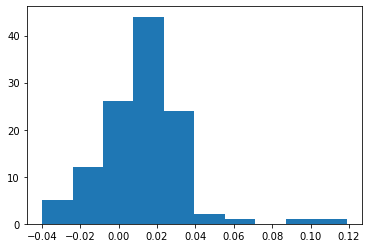

In [10]:
plt.hist(target)

In [11]:
data_after_2010_df.head()

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,generation_renewables_and_storage,generation_steam,roe,pp_mwh_fossil_fuel,pp_mwh_hydro,pp_mwh_nuclear,pp_mwh_other,pp_mwh_renewable,energy_burden,normalized_expenditure
5,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,0.0,44.022450,0.105000,0.0,0.0,0.0,0.0,0.0,0.033783,111.838989
6,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,0.0,39.396937,0.104333,0.0,0.0,0.0,0.0,0.0,0.031261,114.943218
7,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,0.0,33.224328,0.103250,0.0,0.0,0.0,0.0,0.0,0.029887,117.445000
8,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,0.0,35.701607,0.102500,0.0,0.0,0.0,0.0,0.0,0.028994,115.989436
9,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,0.0,35.361499,0.101400,0.0,0.0,0.0,0.0,0.0,0.030413,117.954902


#### Prepare DataFrames for Investments

In [12]:
investment_column_names = ['respondent_id', 'investment_value_distribution',
       'investment_value_hydro', 'investment_value_nuclear',
       'investment_value_other', 'investment_value_other_fossil',
       'investment_value_renewables', 'investment_value_steam',
       'investment_value_transmission', 'sales']

In [13]:
# Create a DataFranme of utility investments

sum_investments_sales_df = data_after_2010_df[investment_column_names].groupby(by=["respondent_id"]).sum()
investment_column_names.remove('respondent_id')
sum_investments_sales_df

,investment_value_distribution,investment_value_hydro,investment_value_nuclear,investment_value_other,investment_value_other_fossil,investment_value_renewables,investment_value_steam,investment_value_transmission,sales
respondent_id,,,,,,,,,
2.0,4.122966e+09,401837956.0,9.306870e+08,4.714471e+09,8.419062e+08,5.482545e+07,5.389831e+09,2.662579e+09,201480394.0
3.0,1.593899e+07,11378848.0,0.000000e+00,1.093068e+07,0.000000e+00,0.000000e+00,0.000000e+00,9.275973e+06,1583903.0
6.0,2.242890e+09,100494780.0,0.000000e+00,4.571355e+08,0.000000e+00,0.000000e+00,1.831950e+09,2.279097e+09,128285422.0
7.0,3.157227e+09,0.0,7.497268e+08,2.100995e+09,1.567304e+09,8.982726e+08,1.079611e+09,1.578813e+09,146399859.0
8.0,1.934680e+09,17928575.0,1.159162e+09,8.035705e+08,0.000000e+00,0.000000e+00,1.700975e+08,1.575136e+09,87340241.0
...,...,...,...,...,...,...,...,...,...
281.0,2.146506e+09,0.0,0.000000e+00,5.060051e+08,7.507275e+08,1.802862e+09,1.063686e+09,0.000000e+00,43065958.0
288.0,2.069657e+08,0.0,0.000000e+00,6.311957e+07,2.597997e+06,2.815807e+07,0.000000e+00,1.070905e+08,9520934.0
290.0,1.972978e+08,0.0,0.000000e+00,4.232020e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5489990.0


In [14]:
sum_investments_sales_df['sum_investments'] = sum_investments_sales_df[investment_column_names].sum(axis=1)
sum_investments_sales_df['sum_investments_generation'] = sum_investments_sales_df['sum_investments'] - sum_investments_sales_df['investment_value_transmission'] - sum_investments_sales_df['investment_value_distribution']
sum_investments_sales_df

,investment_value_distribution,investment_value_hydro,investment_value_nuclear,investment_value_other,investment_value_other_fossil,investment_value_renewables,investment_value_steam,investment_value_transmission,sales,sum_investments,sum_investments_generation
respondent_id,,,,,,,,,,,
2.0,4.122966e+09,401837956.0,9.306870e+08,4.714471e+09,8.419062e+08,5.482545e+07,5.389831e+09,2.662579e+09,201480394.0,1.932058e+10,1.253504e+10
3.0,1.593899e+07,11378848.0,0.000000e+00,1.093068e+07,0.000000e+00,0.000000e+00,0.000000e+00,9.275973e+06,1583903.0,4.910839e+07,2.389343e+07
6.0,2.242890e+09,100494780.0,0.000000e+00,4.571355e+08,0.000000e+00,0.000000e+00,1.831950e+09,2.279097e+09,128285422.0,7.039853e+09,2.517866e+09
7.0,3.157227e+09,0.0,7.497268e+08,2.100995e+09,1.567304e+09,8.982726e+08,1.079611e+09,1.578813e+09,146399859.0,1.127835e+10,6.542309e+09
8.0,1.934680e+09,17928575.0,1.159162e+09,8.035705e+08,0.000000e+00,0.000000e+00,1.700975e+08,1.575136e+09,87340241.0,5.747915e+09,2.238099e+09
...,...,...,...,...,...,...,...,...,...,...,...
281.0,2.146506e+09,0.0,0.000000e+00,5.060051e+08,7.507275e+08,1.802862e+09,1.063686e+09,0.000000e+00,43065958.0,6.312853e+09,4.166347e+09
288.0,2.069657e+08,0.0,0.000000e+00,6.311957e+07,2.597997e+06,2.815807e+07,0.000000e+00,1.070905e+08,9520934.0,4.174528e+08,1.033966e+08
290.0,1.972978e+08,0.0,0.000000e+00,4.232020e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5489990.0,2.451079e+08,4.781018e+07


#### Prepare DataFrames for Expenditures

In [15]:
expenditure_column_names = ['respondent_id', 'expenditure_gas',
       'expenditure_other fuel', 'expenditure_adjustment',
       'expenditure_distribution', 'expenditure_hydro', 'expenditure_nuclear',
       'expenditure_other', 'expenditure_other_fossil',
       'expenditure_purchased_power', 'expenditure_renewables',
       'expenditure_steam', 'expenditure_transmission']

In [16]:
sum_expenditures_df = data_after_2010_df[expenditure_column_names].groupby(by=["respondent_id"]).sum()
expenditure_column_names = expenditure_column_names.remove('respondent_id')
sum_expenditures_df

,expenditure_gas,expenditure_other fuel,expenditure_adjustment,expenditure_distribution,expenditure_hydro,expenditure_nuclear,expenditure_other,expenditure_other_fossil,expenditure_purchased_power,expenditure_renewables,expenditure_steam,expenditure_transmission
respondent_id,,,,,,,,,,,,
2.0,5.132308e+09,1.383818e+08,1.154110e+09,3.828276e+09,5.544618e+08,2.282221e+09,2.405275e+09,2.067986e+09,1.489665e+09,1.176959e+07,9.084542e+09,1.950072e+09
3.0,2.882324e+07,2.040340e+08,-6.762004e+07,2.969037e+07,5.227997e+07,0.000000e+00,9.763331e+07,1.528938e+07,4.715983e+07,0.000000e+00,0.000000e+00,1.830169e+07
6.0,2.836928e+09,9.615715e+08,-7.210860e+08,2.290124e+09,1.512317e+08,0.000000e+00,6.603258e+08,2.607276e+08,3.003127e+09,0.000000e+00,6.127269e+09,1.852221e+09
7.0,3.309975e+09,8.289884e+07,-6.541575e+08,3.825312e+09,-1.939861e+06,2.556462e+09,2.064731e+09,3.710783e+09,1.972733e+09,4.508811e+08,3.033181e+09,1.825703e+09
8.0,2.605195e+09,1.507844e+08,-1.236624e+08,1.218794e+09,2.140047e+07,2.131851e+09,1.322763e+09,3.104126e+08,1.545107e+09,0.000000e+00,1.454663e+09,6.925835e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
281.0,3.309155e+09,1.032936e+08,-5.566223e+08,1.163924e+09,0.000000e+00,0.000000e+00,8.970489e+08,7.006013e+08,1.147378e+09,2.256087e+08,1.419898e+09,1.180497e+09
288.0,3.185888e+08,6.995229e+06,-6.080040e+07,1.826391e+08,0.000000e+00,0.000000e+00,1.250259e+08,1.608683e+08,3.889133e+08,8.437912e+06,0.000000e+00,1.411904e+08
290.0,6.297315e+08,6.775422e+08,2.369448e+07,2.231765e+08,0.000000e+00,0.000000e+00,9.934202e+07,4.451915e+04,3.548869e+08,0.000000e+00,0.000000e+00,1.517976e+08


In [17]:
# Experiencing some errors selecting columns, so respondent id is included in this sum.
# It should not be significant due to the magnitude of the numbers we are working with.
sum_expenditures_df['sum_expenditures'] = sum_expenditures_df.sum(axis=1)
sum_expenditures_df

,expenditure_gas,expenditure_other fuel,expenditure_adjustment,expenditure_distribution,expenditure_hydro,expenditure_nuclear,expenditure_other,expenditure_other_fossil,expenditure_purchased_power,expenditure_renewables,expenditure_steam,expenditure_transmission,sum_expenditures
respondent_id,,,,,,,,,,,,,
2.0,5.132308e+09,1.383818e+08,1.154110e+09,3.828276e+09,5.544618e+08,2.282221e+09,2.405275e+09,2.067986e+09,1.489665e+09,1.176959e+07,9.084542e+09,1.950072e+09,3.009907e+10
3.0,2.882324e+07,2.040340e+08,-6.762004e+07,2.969037e+07,5.227997e+07,0.000000e+00,9.763331e+07,1.528938e+07,4.715983e+07,0.000000e+00,0.000000e+00,1.830169e+07,4.255917e+08
6.0,2.836928e+09,9.615715e+08,-7.210860e+08,2.290124e+09,1.512317e+08,0.000000e+00,6.603258e+08,2.607276e+08,3.003127e+09,0.000000e+00,6.127269e+09,1.852221e+09,1.742244e+10
7.0,3.309975e+09,8.289884e+07,-6.541575e+08,3.825312e+09,-1.939861e+06,2.556462e+09,2.064731e+09,3.710783e+09,1.972733e+09,4.508811e+08,3.033181e+09,1.825703e+09,2.217656e+10
8.0,2.605195e+09,1.507844e+08,-1.236624e+08,1.218794e+09,2.140047e+07,2.131851e+09,1.322763e+09,3.104126e+08,1.545107e+09,0.000000e+00,1.454663e+09,6.925835e+08,1.132989e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281.0,3.309155e+09,1.032936e+08,-5.566223e+08,1.163924e+09,0.000000e+00,0.000000e+00,8.970489e+08,7.006013e+08,1.147378e+09,2.256087e+08,1.419898e+09,1.180497e+09,9.590783e+09
288.0,3.185888e+08,6.995229e+06,-6.080040e+07,1.826391e+08,0.000000e+00,0.000000e+00,1.250259e+08,1.608683e+08,3.889133e+08,8.437912e+06,0.000000e+00,1.411904e+08,1.271859e+09
290.0,6.297315e+08,6.775422e+08,2.369448e+07,2.231765e+08,0.000000e+00,0.000000e+00,9.934202e+07,4.451915e+04,3.548869e+08,0.000000e+00,0.000000e+00,1.517976e+08,2.160216e+09


#### Prepare DataFrames for Generation Mix

In [18]:
# filter for time period and groupby utility
gen_column_names = ['respondent_id',
                    'generation_ee_dr', 
                    'generation_hydro', 
                    'generation_nuclear', 
                    'generation_other_fossil', 
                    'generation_steam', 
                    'generation_purchased_power', 
                    'generation_renewables_and_storage']

gen_mwh_df = data_after_2010_df[gen_column_names].groupby(by=['respondent_id']).sum().reset_index()
gen_mwh_df

,respondent_id,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage
0,2.0,1.573564,44.440870,156.718165,121.418686,367.572053,69.316441,0.104373
1,3.0,0.154320,1.745414,0.000000,0.004462,0.000000,2.970867,0.000000
2,6.0,2.301923,6.638255,0.000000,33.836289,226.739094,181.360370,-0.000532
3,7.0,37.279921,0.000000,101.779936,78.367715,103.697013,81.993071,3.871580
4,8.0,7.991414,1.505050,152.442479,55.169604,69.531089,69.950383,0.000000
...,...,...,...,...,...,...,...,...
111,281.0,22.855596,0.000000,0.000000,27.784398,50.293683,87.047472,11.743245
112,288.0,1.684534,0.000000,0.000000,4.610445,0.000000,19.975106,0.128152
113,290.0,0.218057,0.000000,0.000000,0.000000,0.000000,8.633312,0.000000
114,403.0,0.002083,0.000000,0.000000,0.569699,6.249452,11.676111,0.014090


In [19]:
# filter purchased power for time period and groupby utility
pp_column_names = ['pp_mwh_fossil_fuel',
                   'pp_mwh_renewable',
                   'pp_mwh_hydro',
                   'pp_mwh_nuclear',
                   'pp_mwh_other']

pp_mwh_df = data_after_2010_df[['respondent_id'] + pp_column_names].groupby(by=['respondent_id']).sum().reset_index()
pp_mwh_df['row_subtotal'] = pp_mwh_df.drop(columns=['respondent_id']).sum(axis=1)
pp_mwh_df

,respondent_id,pp_mwh_fossil_fuel,pp_mwh_renewable,pp_mwh_hydro,pp_mwh_nuclear,pp_mwh_other,row_subtotal
0,2.0,8.071236e+06,3.918931e+06,835387.115958,2.550549e+06,34.097516,15376138.0
1,3.0,3.643875e+05,1.101008e+04,137076.462683,0.000000e+00,0.000000,512474.0
2,6.0,1.405366e+07,2.781545e+06,644683.335615,6.231131e+06,4296.456558,23715317.0
3,7.0,9.203444e+06,4.886142e+06,320334.438375,3.407263e+05,4658.703493,14755305.0
4,8.0,1.794192e+06,4.116936e+05,46692.889778,6.079390e+06,6158.336329,8338127.0
...,...,...,...,...,...,...,...
111,281.0,3.309842e+06,4.583742e+06,136012.287647,4.638197e+06,14063.152245,12681856.0
112,288.0,1.730602e+06,6.113953e+05,4982.583096,8.214363e+04,45.459003,2429169.0
113,290.0,7.566340e+05,1.735122e+05,206894.591716,3.931252e+05,0.000000,1530166.0
114,403.0,1.777632e+06,3.981370e+05,46567.749678,1.163423e+03,94.687707,2223595.0


In [20]:
for col in pp_mwh_df:
    if col.startswith('pp'):
        name = 'pct_' + col[7:]
        pp_mwh_df[name] = np.where(pp_mwh_df['row_subtotal'] > 0,
                                   pp_mwh_df[col] / pp_mwh_df['row_subtotal'], 0)
pp_mwh_df = pp_mwh_df[[col for col in pp_mwh_df.columns if col.startswith('pct')]]
pp_mwh_df

,pct_fossil_fuel,pct_renewable,pct_hydro,pct_nuclear,pct_other
0,0.524920,0.254871,0.054330,0.165877,0.000002
1,0.711036,0.021484,0.267480,0.000000,0.000000
2,0.592599,0.117289,0.027184,0.262747,0.000181
3,0.623738,0.331145,0.021710,0.023092,0.000316
4,0.215179,0.049375,0.005600,0.729107,0.000739
...,...,...,...,...,...
111,0.260990,0.361441,0.010725,0.365735,0.001109
112,0.712426,0.251689,0.002051,0.033816,0.000019
113,0.494478,0.113394,0.135211,0.256917,0.000000
114,0.799441,0.179051,0.020943,0.000523,0.000043


In [21]:
# reallocate purchased power to generation
gen_mwh_df['pp_mwh_fossil_fuel'] = gen_mwh_df['generation_purchased_power']*pp_mwh_df['pct_fossil_fuel']
gen_mwh_df['pp_mwh_renewable'] = gen_mwh_df['generation_purchased_power']*pp_mwh_df['pct_renewable']
gen_mwh_df['pp_mwh_hydro'] = gen_mwh_df['generation_purchased_power']*pp_mwh_df['pct_hydro']
gen_mwh_df['pp_mwh_nuclear'] = gen_mwh_df['generation_purchased_power']*pp_mwh_df['pct_nuclear']
gen_mwh_df['pp_mwh_other'] = gen_mwh_df['generation_purchased_power']*pp_mwh_df['pct_other']

In [22]:
# sub totals
gen_mwh_df = data_after_2010_df[gen_column_names+pp_column_names].groupby(by=['respondent_id']).sum().reset_index()
gen_mwh_df['sum_total_generation'] = gen_mwh_df.drop('respondent_id', axis=1).sum(axis=1)
gen_mwh_df['sum_generation_wo_purchased'] = gen_mwh_df.drop(['respondent_id','sum_total_generation', 'generation_purchased_power'], axis=1).sum(axis=1)
gen_mwh_df['sum_fossil_generation'] = gen_mwh_df['generation_steam'] + gen_mwh_df['generation_other_fossil'] + gen_mwh_df['pp_mwh_fossil_fuel']
gen_mwh_df['sum_clean_generation'] = gen_mwh_df['generation_hydro'] + gen_mwh_df['pp_mwh_hydro'] \
                                     + gen_mwh_df['generation_nuclear'] + gen_mwh_df['pp_mwh_nuclear'] \
                                     + gen_mwh_df['generation_renewables_and_storage'] + gen_mwh_df['pp_mwh_renewable']
gen_mwh_df.head()

,respondent_id,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,pp_mwh_fossil_fuel,pp_mwh_renewable,pp_mwh_hydro,pp_mwh_nuclear,pp_mwh_other,sum_total_generation,sum_generation_wo_purchased,sum_fossil_generation,sum_clean_generation
0,2.0,1.573564,44.440870,156.718165,121.418686,367.572053,69.316441,0.104373,8.071236e+06,3.918931e+06,835387.115958,2.550549e+06,34.097516,1.537690e+07,1.537683e+07,8.071725e+06,7.305069e+06
1,3.0,0.154320,1.745414,0.000000,0.004462,0.000000,2.970867,0.000000,3.643875e+05,1.101008e+04,137076.462683,0.000000e+00,0.000000,5.124789e+05,5.124759e+05,3.643875e+05,1.480883e+05
2,6.0,2.301923,6.638255,0.000000,33.836289,226.739094,181.360370,-0.000532,1.405366e+07,2.781545e+06,644683.335615,6.231131e+06,4296.456558,2.371577e+07,2.371559e+07,1.405392e+07,9.657365e+06
3,7.0,37.279921,0.000000,101.779936,78.367715,103.697013,81.993071,3.871580,9.203444e+06,4.886142e+06,320334.438375,3.407263e+05,4658.703493,1.475571e+07,1.475563e+07,9.203626e+06,5.547308e+06
4,8.0,7.991414,1.505050,152.442479,55.169604,69.531089,69.950383,0.000000,1.794192e+06,4.116936e+05,46692.889778,6.079390e+06,6158.336329,8.338484e+06,8.338414e+06,1.794316e+06,6.537931e+06


#### Prepare DataFrames for Bills

In [23]:
bill_column_names = ['respondent_id', 'bill_gas', 'bill_other fuel',
       'bill_adjustment', 'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission']

In [24]:
sum_bills_df = data_after_2010_df[bill_column_names].groupby(by=["respondent_id"]).sum()
bill_column_names = bill_column_names.remove('respondent_id')

# Experiencing some errors selecting columns, so respondent id is included in this sum.
# It should not be significant due to the magnitude of the numbers we are working with.
sum_bills_df['sum_bills'] = sum_bills_df.sum(axis=1)
sum_bills_df

,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,bill_purchased_power,bill_renewables,bill_steam,bill_transmission,sum_bills
respondent_id,,,,,,,,,,,,,
2.0,3112.849798,91.867699,722.505017,2397.651783,347.292020,1428.439814,1508.741296,1298.526264,932.665316,7.251702,5702.835851,1221.078770,18771.705330
3.0,1039.013347,9592.164214,-3610.057522,1578.462964,2795.758135,0.000000,5190.673383,804.549527,2512.004816,0.000000,0.000000,974.200009,20876.768872
6.0,2492.989141,934.347519,-694.036696,2205.920362,145.683812,0.000000,635.040939,251.289644,2886.430488,0.000000,5898.707403,1785.539222,16541.911835
7.0,2291.888455,64.010759,-474.081710,2790.104225,-1.473992,1877.509148,1499.625556,2719.986126,1435.407503,324.879991,2216.204948,1328.673630,16072.734640
8.0,3539.049894,204.800539,-160.285125,1616.729997,28.378125,2828.859928,1753.931631,411.205319,2057.549449,0.000000,1931.627131,917.978640,15129.825529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281.0,5926.665316,187.696145,-1035.572238,2163.386881,0.000000,0.000000,1668.111884,1303.731693,2131.163486,419.041449,2637.799451,2194.358292,17596.382360
288.0,3013.871089,59.328315,-576.979726,1721.097976,0.000000,0.000000,1174.632778,1502.781003,3695.049646,77.144827,0.000000,1320.371195,11987.297102
290.0,6482.254469,6239.562285,259.092912,2436.188675,0.000000,0.000000,1085.240738,0.487741,3887.540777,0.000000,0.000000,1655.217579,22045.585176


#### Prepare DataFrame for Utility Info

In [25]:
utility_info_df = data_after_2010_df[['respondent_id', 'utype', 'roe']].groupby(by=['respondent_id']).first().reset_index()
utility_info_df.head(10)

,respondent_id,utype,roe
0,2.0,vert_int,0.105000
1,3.0,vert_int,0.128800
2,6.0,vert_int,0.103387
3,7.0,vert_int,0.110000
4,8.0,vert_int,0.099000
5,9.0,other_wires,0.097500
6,10.0,other_wires,0.098600
7,11.0,restructured,0.102000
8,17.0,vert_int,0.101837
9,19.0,restructured,0.100000


#### Create feature variables

__x01__: % of investments that go to transmission and distribution

(array([ 1.,  1.,  7., 21., 13., 11.,  9., 11., 20., 22.]),
 array([0.05006068, 0.14105165, 0.23204261, 0.32303357, 0.41402454,
        0.5050155 , 0.59600646, 0.68699743, 0.77798839, 0.86897936,
        0.95997032]),
 <BarContainer object of 10 artists>)

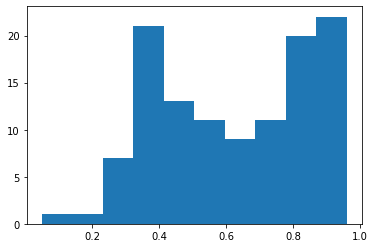

In [26]:
# x1 is the % of investments that go to transmission and distribution
sum_investments_sales_df['pct_poles_and_wires'] = \
    (sum_investments_sales_df['investment_value_transmission'] + \
    sum_investments_sales_df['investment_value_distribution']) / \
    sum_investments_sales_df['sum_investments']
x01_poles_wires_investment_pct = sum_investments_sales_df['pct_poles_and_wires'].reset_index(drop=True)
plt.hist(x01_poles_wires_investment_pct)

__x02__: % of expenditures spent on clean energy

(array([63.,  4., 15., 10.,  6.,  6.,  4.,  3.,  3.,  2.]),
 array([-1.56211400e-04,  8.54506659e-02,  1.71057543e-01,  2.56664421e-01,
         3.42271298e-01,  4.27878175e-01,  5.13485053e-01,  5.99091930e-01,
         6.84698807e-01,  7.70305685e-01,  8.55912562e-01]),
 <BarContainer object of 10 artists>)

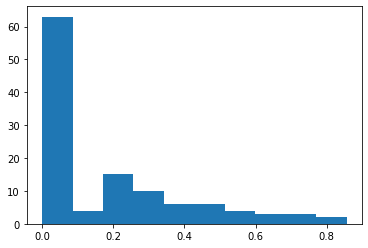

In [27]:
# x2 measures the % of expenitures for "clean" energy (renewables, nuclear, and hydro)
investments_fossil = sum_investments_sales_df['investment_value_steam'] + sum_investments_sales_df['investment_value_other_fossil']
investments_clean = sum_investments_sales_df['investment_value_renewables'] + sum_investments_sales_df['investment_value_nuclear'] + sum_investments_sales_df['investment_value_hydro']
sum_investments_sales_df['pct_renewable_investment'] = np.where(
    sum_investments_sales_df['sum_investments_generation'] != 0,
    investments_clean / sum_investments_sales_df['sum_investments_generation'], 
    0)
x02_renewables_investment_pct = sum_investments_sales_df['pct_renewable_investment'].reset_index(drop=True)
plt.hist(x02_renewables_investment_pct)

__x03__: total investments over sales

(array([ 9., 30., 31., 28., 11.,  3.,  2.,  0.,  1.,  1.]),
 array([  1.06667251,  26.59099713,  52.11532174,  77.63964635,
        103.16397096, 128.68829557, 154.21262018, 179.73694479,
        205.2612694 , 230.78559401, 256.30991862]),
 <BarContainer object of 10 artists>)

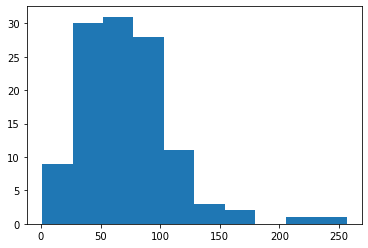

In [28]:
# x3 measures the total investments, divided by sales
sum_investments_sales_df['total_divided_by_sales'] = sum_investments_sales_df['sum_investments']/sum_investments_sales_df['sales']
x03_total_investment_divided_by_sales = sum_investments_sales_df['total_divided_by_sales'].reset_index(drop=True)
x03_total_investment_divided_by_sales[x03_total_investment_divided_by_sales>400] = x03_total_investment_divided_by_sales.median()
plt.hist(x03_total_investment_divided_by_sales)

__x04__: residential / total customers

Note, this is currently done with data from 'housing' and 'customers' columns, but could be done better with the data from customers_sales.csv

In [29]:
customer_names = ['respondent_id', 'housing_units', 'customers']
sum_customers_df = data_after_2010_df[customer_names].groupby(by=["respondent_id"]).sum()
                                      
print(sum_customers_df)

               housing_units   customers
respondent_id                           
2.0               13826176.0  13826176.0
3.0                 157356.0    157356.0
6.0                8929786.0   8929739.0
7.0               11613067.0  11606634.0
8.0                6477428.0   6477428.0
...                      ...         ...
281.0              4471556.0   4670008.0
288.0               918388.0    913536.0
290.0               718213.0    718210.0
403.0               401883.0    401366.0
428.0               603578.0    598805.0

[116 rows x 2 columns]


(array([  1.,   9., 100.,   1.,   1.,   2.,   0.,   0.,   1.,   1.]),
 array([0.86351295, 0.92831288, 0.99311281, 1.05791274, 1.12271267,
        1.18751261, 1.25231254, 1.31711247, 1.3819124 , 1.44671233,
        1.51151226]),
 <BarContainer object of 10 artists>)

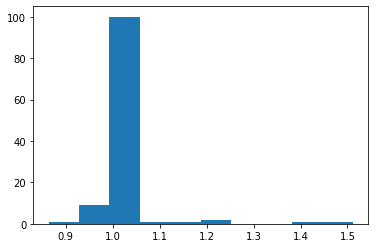

In [30]:
sum_customers_df['residential_ratio'] = sum_customers_df['housing_units']/sum_customers_df['customers']
x04_residential_customer_ratio = sum_customers_df['residential_ratio'].reset_index(drop=True)
plt.hist(x04_residential_customer_ratio)

__x05__: renewable / total generation (mwh)

(array([ 5.,  6., 24., 22., 21., 18., 10.,  6.,  2.,  2.]),
 array([0.01172419, 0.11016866, 0.20861313, 0.30705761, 0.40550208,
        0.50394655, 0.60239102, 0.70083549, 0.79927996, 0.89772444,
        0.99616891]),
 <BarContainer object of 10 artists>)

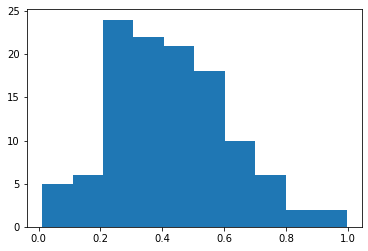

In [31]:
gen_mwh_df['renewable_generation_ratio'] = np.where(
    gen_mwh_df['sum_total_generation'] != 0,
    gen_mwh_df['sum_clean_generation'] / gen_mwh_df['sum_total_generation'],
    0)
x05_renewable_generation_ratio = gen_mwh_df['renewable_generation_ratio']
plt.hist(x05_renewable_generation_ratio) 

__x06__: nuclear / clean generation (mwh)

(array([31.,  7.,  4.,  5.,  8., 22.,  6., 11., 16.,  6.]),
 array([-0.0030239 ,  0.09624222,  0.19550835,  0.29477447,  0.39404059,
         0.49330672,  0.59257284,  0.69183896,  0.79110508,  0.89037121,
         0.98963733]),
 <BarContainer object of 10 artists>)

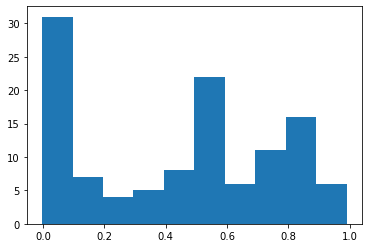

In [32]:
gen_mwh_df['nuclear_renewable_ratio'] = np.where(
    gen_mwh_df['sum_clean_generation'] != 0,
    (gen_mwh_df['generation_nuclear'] + gen_mwh_df['pp_mwh_nuclear']) / gen_mwh_df['sum_clean_generation'],
    0)
x06_nuclear_renewable_mwh_ratio = gen_mwh_df['nuclear_renewable_ratio']
plt.hist(x06_nuclear_renewable_mwh_ratio)

__x07__: hydro / clean generation (mwh)

(array([80., 17.,  8.,  5.,  2.,  2.,  1.,  0.,  0.,  1.]),
 array([0.        , 0.14026139, 0.28052277, 0.42078416, 0.56104555,
        0.70130693, 0.84156832, 0.9818297 , 1.12209109, 1.26235248,
        1.40261386]),
 <BarContainer object of 10 artists>)

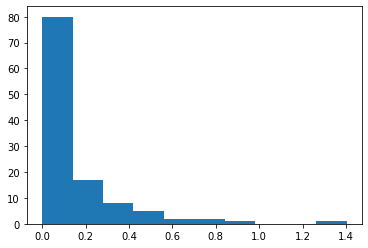

In [33]:
gen_mwh_df['hydro_renewable_ratio'] = np.where(
    gen_mwh_df['sum_clean_generation'] != 0,
    (gen_mwh_df['generation_hydro'] + gen_mwh_df['pp_mwh_hydro']) / gen_mwh_df['sum_clean_generation'],
    0)
x07_hydro_renewable_mwh_ratio = gen_mwh_df['hydro_renewable_ratio']
plt.hist(x07_hydro_renewable_mwh_ratio)

__x08__: regulatory environment (rps targets)

(array([57., 21., 15.,  6.,  2.,  1.,  4.,  3.,  1.,  6.]),
 array([ 0.        ,  5.09090909, 10.18181818, 15.27272727, 20.36363636,
        25.45454545, 30.54545455, 35.63636364, 40.72727273, 45.81818182,
        50.90909091]),
 <BarContainer object of 10 artists>)

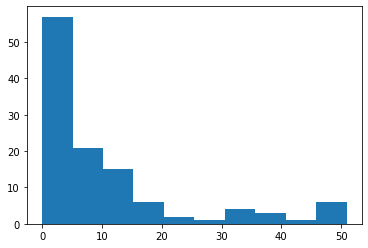

In [34]:
data_from_2020 = data_after_2010_df[data_after_2010_df['year'] == 2020].copy()
data_year_mean = data_after_2010_df.groupby(['respondent_id']).agg({'rps_score': ['mean']}).reset_index(drop=True)
data_year_mean = data_year_mean.droplevel(1, axis=1)
x08_regulatory_rps_target = data_year_mean['rps_score']
plt.hist(x08_regulatory_rps_target)

__c09__: regulated rate of return by utility

(array([ 1.,  0.,  0.,  0.,  0.,  1., 42., 65.,  6.,  1.]),
 array([0.        , 0.01477472, 0.02954945, 0.04432417, 0.05909889,
        0.07387362, 0.08864834, 0.10342306, 0.11819778, 0.13297251,
        0.14774723]),
 <BarContainer object of 10 artists>)

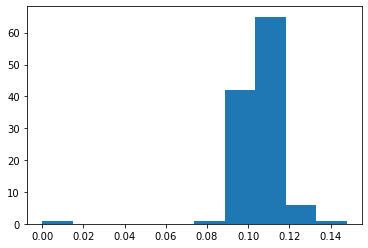

In [35]:
x09_regulated_rate_of_return = utility_info_df['roe']
plt.hist(x09_regulated_rate_of_return)

__c10__: utility type (veritcally integrated, poles and wires only, etc.)

(array([70.,  0.,  0., 31.,  0.,  0., 14.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

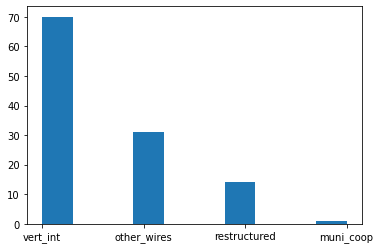

In [36]:
c10_utility_type = utility_info_df['utype']
plt.hist(c10_utility_type)

Consolidate feature variables into model_data table

In [37]:
model_data = pd.DataFrame(
    {
        'target': target, 
        'x01': x01_poles_wires_investment_pct,
        'x02': x02_renewables_investment_pct,
        'x03': x03_total_investment_divided_by_sales,
        'x04': x04_residential_customer_ratio,
        'x05': x05_renewable_generation_ratio,
        'x06': x06_nuclear_renewable_mwh_ratio,
        'x07': x07_hydro_renewable_mwh_ratio,
        'x08': x08_regulatory_rps_target,
        'x09': x09_regulated_rate_of_return,
        'c10': c10_utility_type,
    }
)
model_data

,target,x01,x02,x03,x04,x05,x06,x07,x08,x09,c10
0,0.019042,0.351208,0.110678,95.893125,1.000000,0.475068,0.349169,0.114363,0.000000,0.105000,vert_int
1,0.015868,0.513455,0.476233,31.004672,1.000000,0.288965,0.000000,0.925652,0.000000,0.128800,vert_int
2,0.022832,0.642341,0.039913,54.876484,1.000005,0.407213,0.645221,0.066756,10.487586,0.103387,vert_int
3,0.012631,0.419923,0.251899,77.037977,1.000554,0.375943,0.061440,0.057746,14.585460,0.110000,vert_int
4,0.019896,0.610624,0.525933,65.810615,1.000000,0.784067,0.929888,0.007142,0.000000,0.099000,vert_int
...,...,...,...,...,...,...,...,...,...,...,...
111,0.024167,0.340022,0.432720,146.585683,0.957505,0.737890,0.495642,0.014534,0.736438,0.109318,vert_int
112,-0.000717,0.752316,0.272331,43.845785,1.005311,0.287553,0.117596,0.007133,11.250000,0.100000,vert_int
113,0.018307,0.804942,0.000000,44.646336,1.000004,0.505519,0.508221,0.267467,0.000000,0.096700,other_wires
114,0.031448,0.712044,0.425716,87.288900,1.001288,0.200515,0.002609,0.104443,0.000000,0.109000,vert_int


#### Check for covariance

In [38]:
# import seaborn as sns
# sns.pairplot(model_data.drop(columns=['target']))

In [39]:
corr = model_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,target,x01,x02,x03,x04,x05,x06,x07,x08,x09
target,1.000000,-0.477051,0.160433,0.233352,-0.150931,-0.102244,-0.219132,0.144285,-0.086536,-0.089487
x01,-0.477051,1.000000,-0.334536,-0.441633,0.177967,0.114342,0.360970,0.051637,0.108929,-0.149085
x02,0.160433,-0.334536,1.000000,0.387111,-0.111374,0.073893,-0.237126,0.104610,0.323810,0.062174
x03,0.233352,-0.441633,0.387111,1.000000,-0.053620,0.063856,-0.212727,-0.085785,0.181448,-0.170734
x04,-0.150931,0.177967,-0.111374,-0.053620,1.000000,0.026799,0.105260,0.051104,0.194726,-0.047646
x05,-0.102244,0.114342,0.073893,0.063856,0.026799,1.000000,-0.183675,-0.183637,0.190209,0.033905
x06,-0.219132,0.360970,-0.237126,-0.212727,0.105260,-0.183675,1.000000,-0.314519,-0.156951,0.069861
x07,0.144285,0.051637,0.104610,-0.085785,0.051104,-0.183637,-0.314519,1.000000,0.090248,-0.134473
x08,-0.086536,0.108929,0.323810,0.181448,0.194726,0.190209,-0.156951,0.090248,1.000000,0.003367
x09,-0.089487,-0.149085,0.062174,-0.170734,-0.047646,0.033905,0.069861,-0.134473,0.003367,1.000000


#### Save model_data file

In [40]:
output_dir = os.path.join('..', 'data', 'processed', 'model_v1')

In [41]:
model_data.to_csv(os.path.join(output_dir, 'model_data.csv'), index=False)